In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
%cd 'Progetto Covid Gruppo Horror'/
%ls

In [53]:
df_regioni = pd.read_csv("covid19_region_python_w_daily_deaths.csv")
df_air = pd.read_csv("df_air.csv", index_col=0)
df_comuni = pd.read_csv("comuni_clean.csv",sep=";")

In [54]:
# sostituisco P.A. di Bolzano e P.A. Trento con Trentino Alto Adige
df_air['Regione'] = df_air.iloc[:,2].replace('P.A. Trento', 'Trentino Alto Adige')
df_air['Regione'] = df_air.iloc[:,2].replace('P.A. Bolzano', 'Trentino Alto Adige')

In [55]:
# faccio un df in cui ho la somma dei decessi per regione
tot_deaths = df_regioni.groupby('RegionName')['Daily_Deaths'].sum()
df_deaths = tot_deaths.to_frame().reset_index()

In [57]:
# faccio un dataframe sul totale della popolazione
tot_popolazione = df_comuni.groupby("Regione")["Popolazione2011"].sum()
df_pop = tot_popolazione.to_frame().reset_index()

In [58]:
# unisco i dati delle due tabelle
df_summary = df_deaths.merge(tot_popolazione, left_on='RegionName', right_on='Regione')

In [59]:
# aggiungo una colonna sul tasso di mortalita
df_summary['death%'] = (df_summary['Daily_Deaths']/df_summary['Popolazione2011'])*100


                  Regione  max       mean  median
0                 Abruzzo    3  12.666667    11.0
1              Basilicata    1  10.000000    10.0
2                Calabria    4  16.500000    16.0
3                Campania    3  24.666667    24.0
4          Emilia Romagna    4  16.000000    18.5
5   Friuli Venezia Giulia    3  14.333333    15.0
6                   Lazio    4  18.250000    16.5
7                 Liguria    6  16.000000    16.0
8               Lombardia    7  25.000000    27.0
9                  Marche    2  13.000000    13.0
10                 Molise    3  14.000000    11.0
11               Piemonte    4  23.500000    23.0
12                 Puglia    4  17.250000    16.0
13               Sardegna    4  10.250000    10.0
14                Sicilia    1  16.000000    16.0
15                Toscana    6  19.166667    19.5
16    Trentino Alto Adige    3  11.666667    14.0
17                 Umbria    3  20.666667    21.0
18          Valle d'Aosta    2  12.000000    12.0


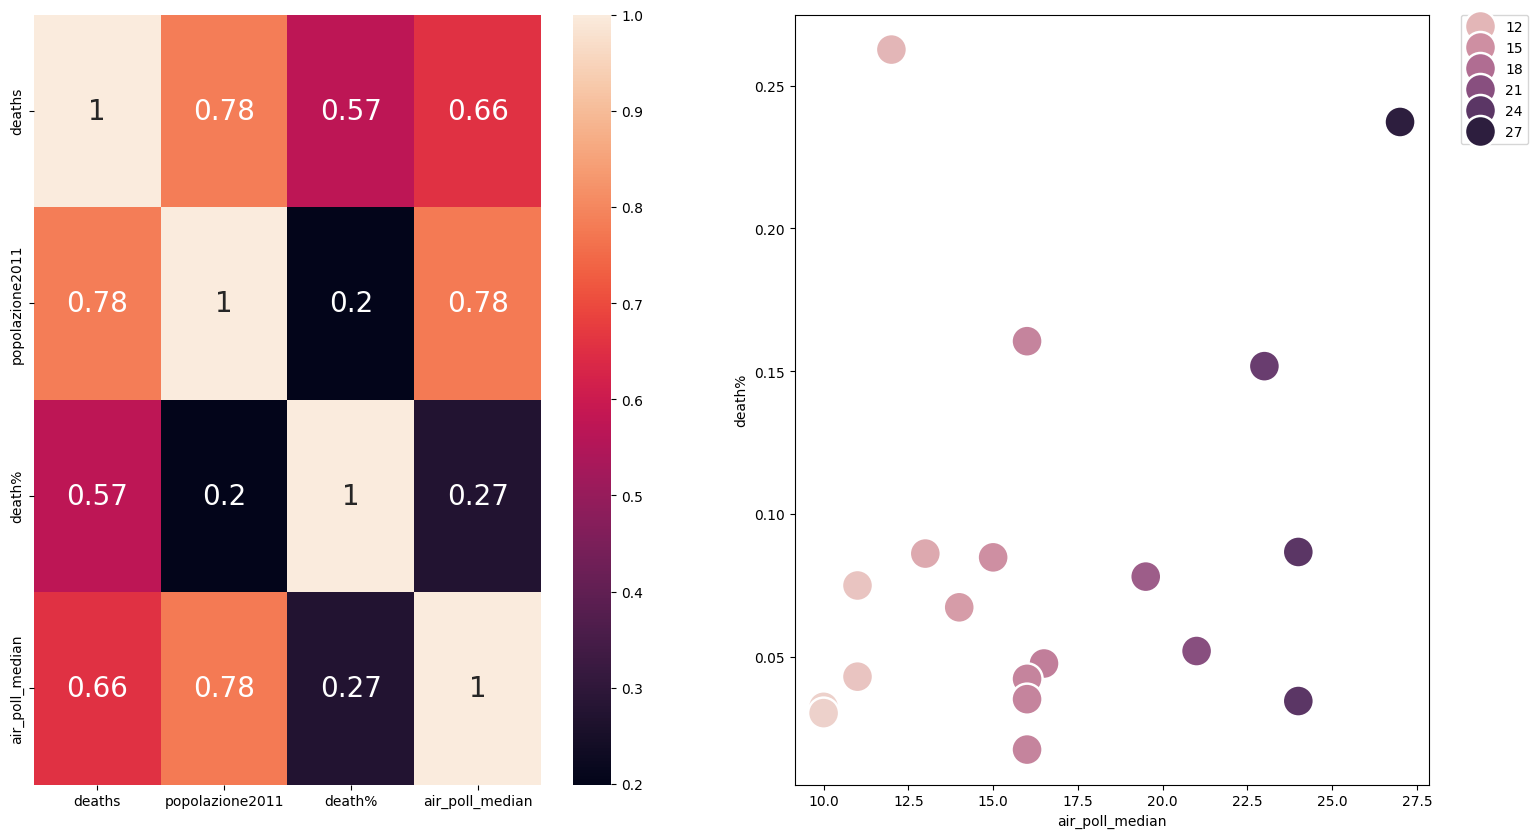

In [60]:
# costruisco un df sull'inquinamento dell'aria
df_air_med = df_air.groupby('Regione').agg({'max media annuale (mg/m3)': ['count', 'mean', 'median']}).reset_index()
df_air_med.columns = ['Regione', 'max', 'mean', 'median']
print(df_air_med)

df_summary = df_summary.sort_values(by='death%', ascending=False).merge(df_air_med, left_on='RegionName',right_on='Regione')


df_summary = df_summary.iloc[:,[0,1,2,3,7]]
df_summary.columns = ['Regione','deaths','popolazione2011','death%','air_poll_median']

heatmapshow = df_summary[['deaths','popolazione2011','death%','air_poll_median']].corr()
plt.figure(figsize=(18,10))
plt.subplot(122)
sns.scatterplot(x=df_summary.iloc[:,4], y= df_summary['death%'], data=df_summary, hue='air_poll_median', s=500)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.subplot(121)
sns.heatmap(heatmapshow, annot=True, annot_kws={'size':20})

plt.show()